<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_5_6_ImageNet_AlexNet_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True,
    transform=torchvision.transforms.ToTensor())

train_dataloader = DataLoader(
    train_data_transformed, batch_size=1)
img, label = next(iter(train_dataloader))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

#Image Augmentation

In [ ]:
import torchvision.transforms as T
resize = T.Resize(256)
new_img = resize(img)
new_img.size()

torch.Size([1, 1, 256, 256])

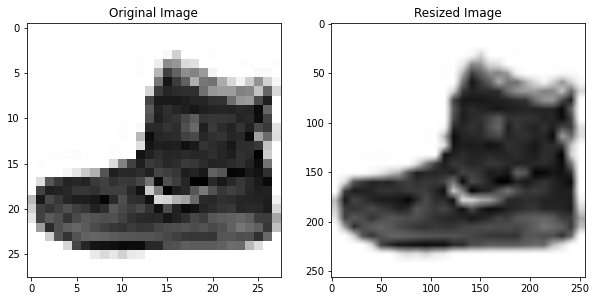

In [ ]:
fig,axes = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(10)
axes[0].imshow(img.squeeze().detach(), cmap='Greys')
axes[0].set_title("Original Image")


axes[1].imshow(new_img.squeeze().detach(), cmap='Greys')
axes[1].set_title("Resized Image");

In [ ]:
transforms = T.Compose([T.Resize(256),
               T.RandomCrop(224),
               T.RandomHorizontalFlip(0.5),
               T.RandomRotation(30),
               T.RandomPerspective(distortion_scale=0.3, p=0.5)])

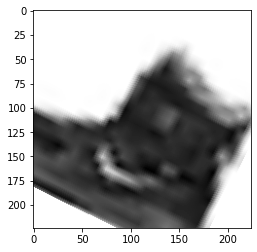

In [ ]:
randcrop = T.RandomCrop(224)
new_img2 = transforms(img)
new_img2.size()
plt.imshow(new_img2.squeeze(), cmap='Greys');

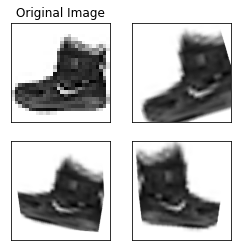

In [ ]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(4)
fig.set_figwidth(4)


for i in range(2):
  for j in range(2):
    ax = axes[i,j]
    randcrop = T.RandomCrop(224)
    new_img = transforms(img)
    ax.imshow(new_img.squeeze().detach(), cmap='Greys')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

axes[0,0].imshow(img.squeeze().detach(), cmap='Greys')
axes[0,0].set_title("Original Image")
axes[0,0].axes.get_xaxis().set_visible(False)
axes[0,0].axes.get_yaxis().set_visible(False)

In [ ]:
transforms = T.Compose([T.ToTensor(),
               T.Resize(256),
               T.RandomCrop(224),
               T.RandomHorizontalFlip(0.5),
               T.RandomRotation(30),
               T.RandomPerspective(distortion_scale=0.3, p=0.5)])

In [ ]:
train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True,
    transform=transforms)

train_dataloader = DataLoader(
    train_data_transformed, batch_size=512)


test_transforms = T.Compose([T.ToTensor(),
                           T.Resize(256),
                           T.CenterCrop(224)])
test_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=False, download=True,
    transform=test_transforms)
test_dataloader = DataLoader(
    test_data_transformed, batch_size=1024)

#AlexNet 

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, dropout=0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 11, stride=4, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, 1000))
    def forward(self, X):
        X = self.features(X)
        X = self.classifier(X.flatten(start_dim=1))
        return X

In [ ]:
model = AlexNet()
x = torch.rand((1,3,224,224))
model(x).size()
print("Features")
for layer in model.features.children():
  x = layer(x)
  print(layer.__class__.__name__, "\t", x.size())
x = x.flatten(start_dim=1)
print(x.size())
print("\nClassifier")
for layer in model.classifier.children():
  x = layer(x)
  print(layer.__class__.__name__, "\t", x.size())

Features
Conv2d 	 torch.Size([1, 64, 55, 55])
ReLU 	 torch.Size([1, 64, 55, 55])
MaxPool2d 	 torch.Size([1, 64, 27, 27])
Conv2d 	 torch.Size([1, 192, 27, 27])
ReLU 	 torch.Size([1, 192, 27, 27])
MaxPool2d 	 torch.Size([1, 192, 13, 13])
Conv2d 	 torch.Size([1, 384, 13, 13])
ReLU 	 torch.Size([1, 384, 13, 13])
Conv2d 	 torch.Size([1, 256, 13, 13])
ReLU 	 torch.Size([1, 256, 13, 13])
Conv2d 	 torch.Size([1, 256, 13, 13])
ReLU 	 torch.Size([1, 256, 13, 13])
MaxPool2d 	 torch.Size([1, 256, 6, 6])
torch.Size([1, 9216])

Classifier
Dropout 	 torch.Size([1, 9216])
Linear 	 torch.Size([1, 4096])
ReLU 	 torch.Size([1, 4096])
Dropout 	 torch.Size([1, 4096])
Linear 	 torch.Size([1, 4096])
ReLU 	 torch.Size([1, 4096])
Linear 	 torch.Size([1, 1000])


#LeNet

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = torch.nn.Sequential( 
            torch.nn.Conv2d(1, 6, 5),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(6, 16, 5),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2))
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(16*5*5, 120),
            torch.nn.ReLU(),
            torch.nn.Linear(120, 84),
            torch.nn.ReLU(),
            torch.nn.Linear(84, num_classes))
    def forward(self, X):
        X = self.features(X)
        X = self.classifier(X.flatten(start_dim=1))
        return X